In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tikzplotlib

In [38]:
value_name = 'validate_no_aug_accuracy/dataloader_idx_1'

# figure_title = 'comparison_to_baselines'
# rename_dict = {'LLN-ours': 'Ours', 
#                'LLN-convFalse': 'Thiry',
#                'LLN-random_patches': 'Random Patches',
#                'CNN': 'Vanilla CNN'}

# figure_title = 'depth_acc_phi_full'
# rename_dict = {f'LLN-deep-sumlogitsFalse-k256_128-ps53-pool22-bnTrue-bneck32_layer_{depth}': f'depth={depth}' 
#                for depth in [1, 2, 3, 4]}

# figure_title = 'depth_acc_phi_hard'
# rename_dict = {f'LLN-deep-sumlogitsFalse-convFalse-k256_128-ps53-pool22-bnTrue-bneck32_layer_{depth}': f'depth={depth}' 
#                for depth in [1, 2, 3, 4]}

# figure_title = 'depth_acc_cnn'
# rename_dict = {f'LLN-deep-sumlogitsFalse-CNN-ps53-pool22-bnTrue-bneck32_layer_{depth}': f'depth={depth}' 
#                for depth in [1, 2, 3, 4]}

figure_title = 'depth_acc_cnn_layerwise'
rename_dict = {f'LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_{depth}': f'depth={depth}' 
               for depth in [1, 2, 3, 4]}


In [39]:
df = pd.read_csv(f'./{figure_title}.csv')
df.head()

,epoch,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_4 - _step,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_4 - _step__MIN,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_4 - _step__MAX,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_4 - validate_no_aug_accuracy/dataloader_idx_1,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_4 - validate_no_aug_accuracy/dataloader_idx_1__MIN,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_4 - validate_no_aug_accuracy/dataloader_idx_1__MAX,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_3 - _step,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_3 - _step__MIN,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_3 - _step__MAX,...,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_2 - _step__MAX,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_2 - validate_no_aug_accuracy/dataloader_idx_1,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_2 - validate_no_aug_accuracy/dataloader_idx_1__MIN,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_2 - validate_no_aug_accuracy/dataloader_idx_1__MAX,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_1 - _step,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_1 - _step__MIN,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_1 - _step__MAX,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_1 - validate_no_aug_accuracy/dataloader_idx_1,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_1 - validate_no_aug_accuracy/dataloader_idx_1__MIN,LLN-deep-sumlogitsFalse-CNN-layerwise-k256_128-ps53-pool22-bnTrue-bneck32_layer_1 - validate_no_aug_accuracy/dataloader_idx_1__MAX
0,0,15,15,15,0.8283,0.8283,0.8283,15,15,15,...,15,0.7302,0.7302,0.7302,15,15,15,0.4758,0.4758,0.4758
1,1,32,32,32,0.8390,0.8390,0.8390,32,32,32,...,32,0.7736,0.7736,0.7736,32,32,32,0.5199,0.5199,0.5199
2,2,48,48,48,0.8399,0.8399,0.8399,48,48,48,...,48,0.7798,0.7798,0.7798,48,48,48,0.5155,0.5155,0.5155
3,3,65,65,65,0.8463,0.8463,0.8463,65,65,65,...,65,0.7814,0.7814,0.7814,65,65,65,0.5519,0.5519,0.5519
4,4,82,82,82,0.8435,0.8435,0.8435,82,82,82,...,82,0.7884,0.7884,0.7884,82,82,82,0.5639,0.5639,0.5639


In [40]:
xlabel = df.columns[0]
xs = df[xlabel].values

relevant_columns = [c for c in df.columns if c.endswith(value_name)]
df = df[relevant_columns]
df = df.rename(columns={c: c.replace(f' - {value_name}', '') for c in df.columns})
df = df.rename(columns=rename_dict)
df *= 100  # Convert from fraction to precentages
df.head()

,depth=4,depth=3,depth=2,depth=1
0,82.830000,80.739999,73.019999,47.580001
1,83.899999,81.919998,77.359998,51.990002
2,83.990002,83.560002,77.980000,51.550001
3,84.630001,84.340000,78.140002,55.190003
4,84.350002,84.009999,78.839999,56.389999


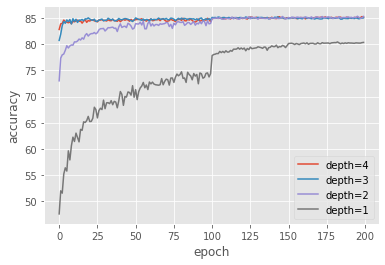

In [41]:
plt.figure()
plt.style.use("ggplot")
for c in df.columns:
    plt.plot(xs, df[c], label=c)
plt.xlabel(xlabel)
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
tikzplotlib.save(f'{figure_title}.tex')

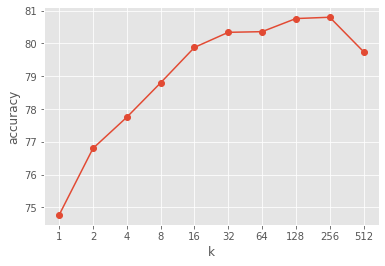

In [18]:
# Create accuracy per k plot
ys = [74.77, 76.8, 77.75, 78.8, 79.88, 80.34, 80.36, 80.76, 80.8, 79.75]

plt.figure()
plt.style.use("ggplot")
plt.plot(np.arange(1, len(ys)+1), ys, marker='o')
plt.xlabel('k')
plt.xticks(ticks=xs, labels=[    1,    2,     4,    8,    16,    32,    64,  128,   256,   512])
# plt.yticks(ticks=ys, labels=ys)
plt.ylabel('accuracy')
plt.grid(True)
tikzplotlib.save(f'acc_per_k.tex')